In [1]:
import matplotlib.pyplot as plt
from ponask.vocab import Vocab
from ponask.bert import BERT
import torch
from sklearn.manifold import TSNE

In [2]:
def load_vocab(path):
    with open(path) as f:
        tokens = [x.strip() for x in f]
    vocab = Vocab(tokens)
    return vocab

In [3]:
vocab = load_vocab('vocab.txt')
model = BERT(len(vocab), 128, 4, 256, 0, 0, 0, 12)
model.load_state_dict(torch.load('bert.pt', map_location = 'cpu'))
model.eval()
print(sum(p.numel() for p in model.parameters()))

1660401


In [4]:
embed = model.embedding.token_embedding.weight.data
embed.shape

torch.Size([241, 128])

/home/nymwa/nymwa/tokipona/envs/loha9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nymwa/nymwa/tokipona/envs/loha9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


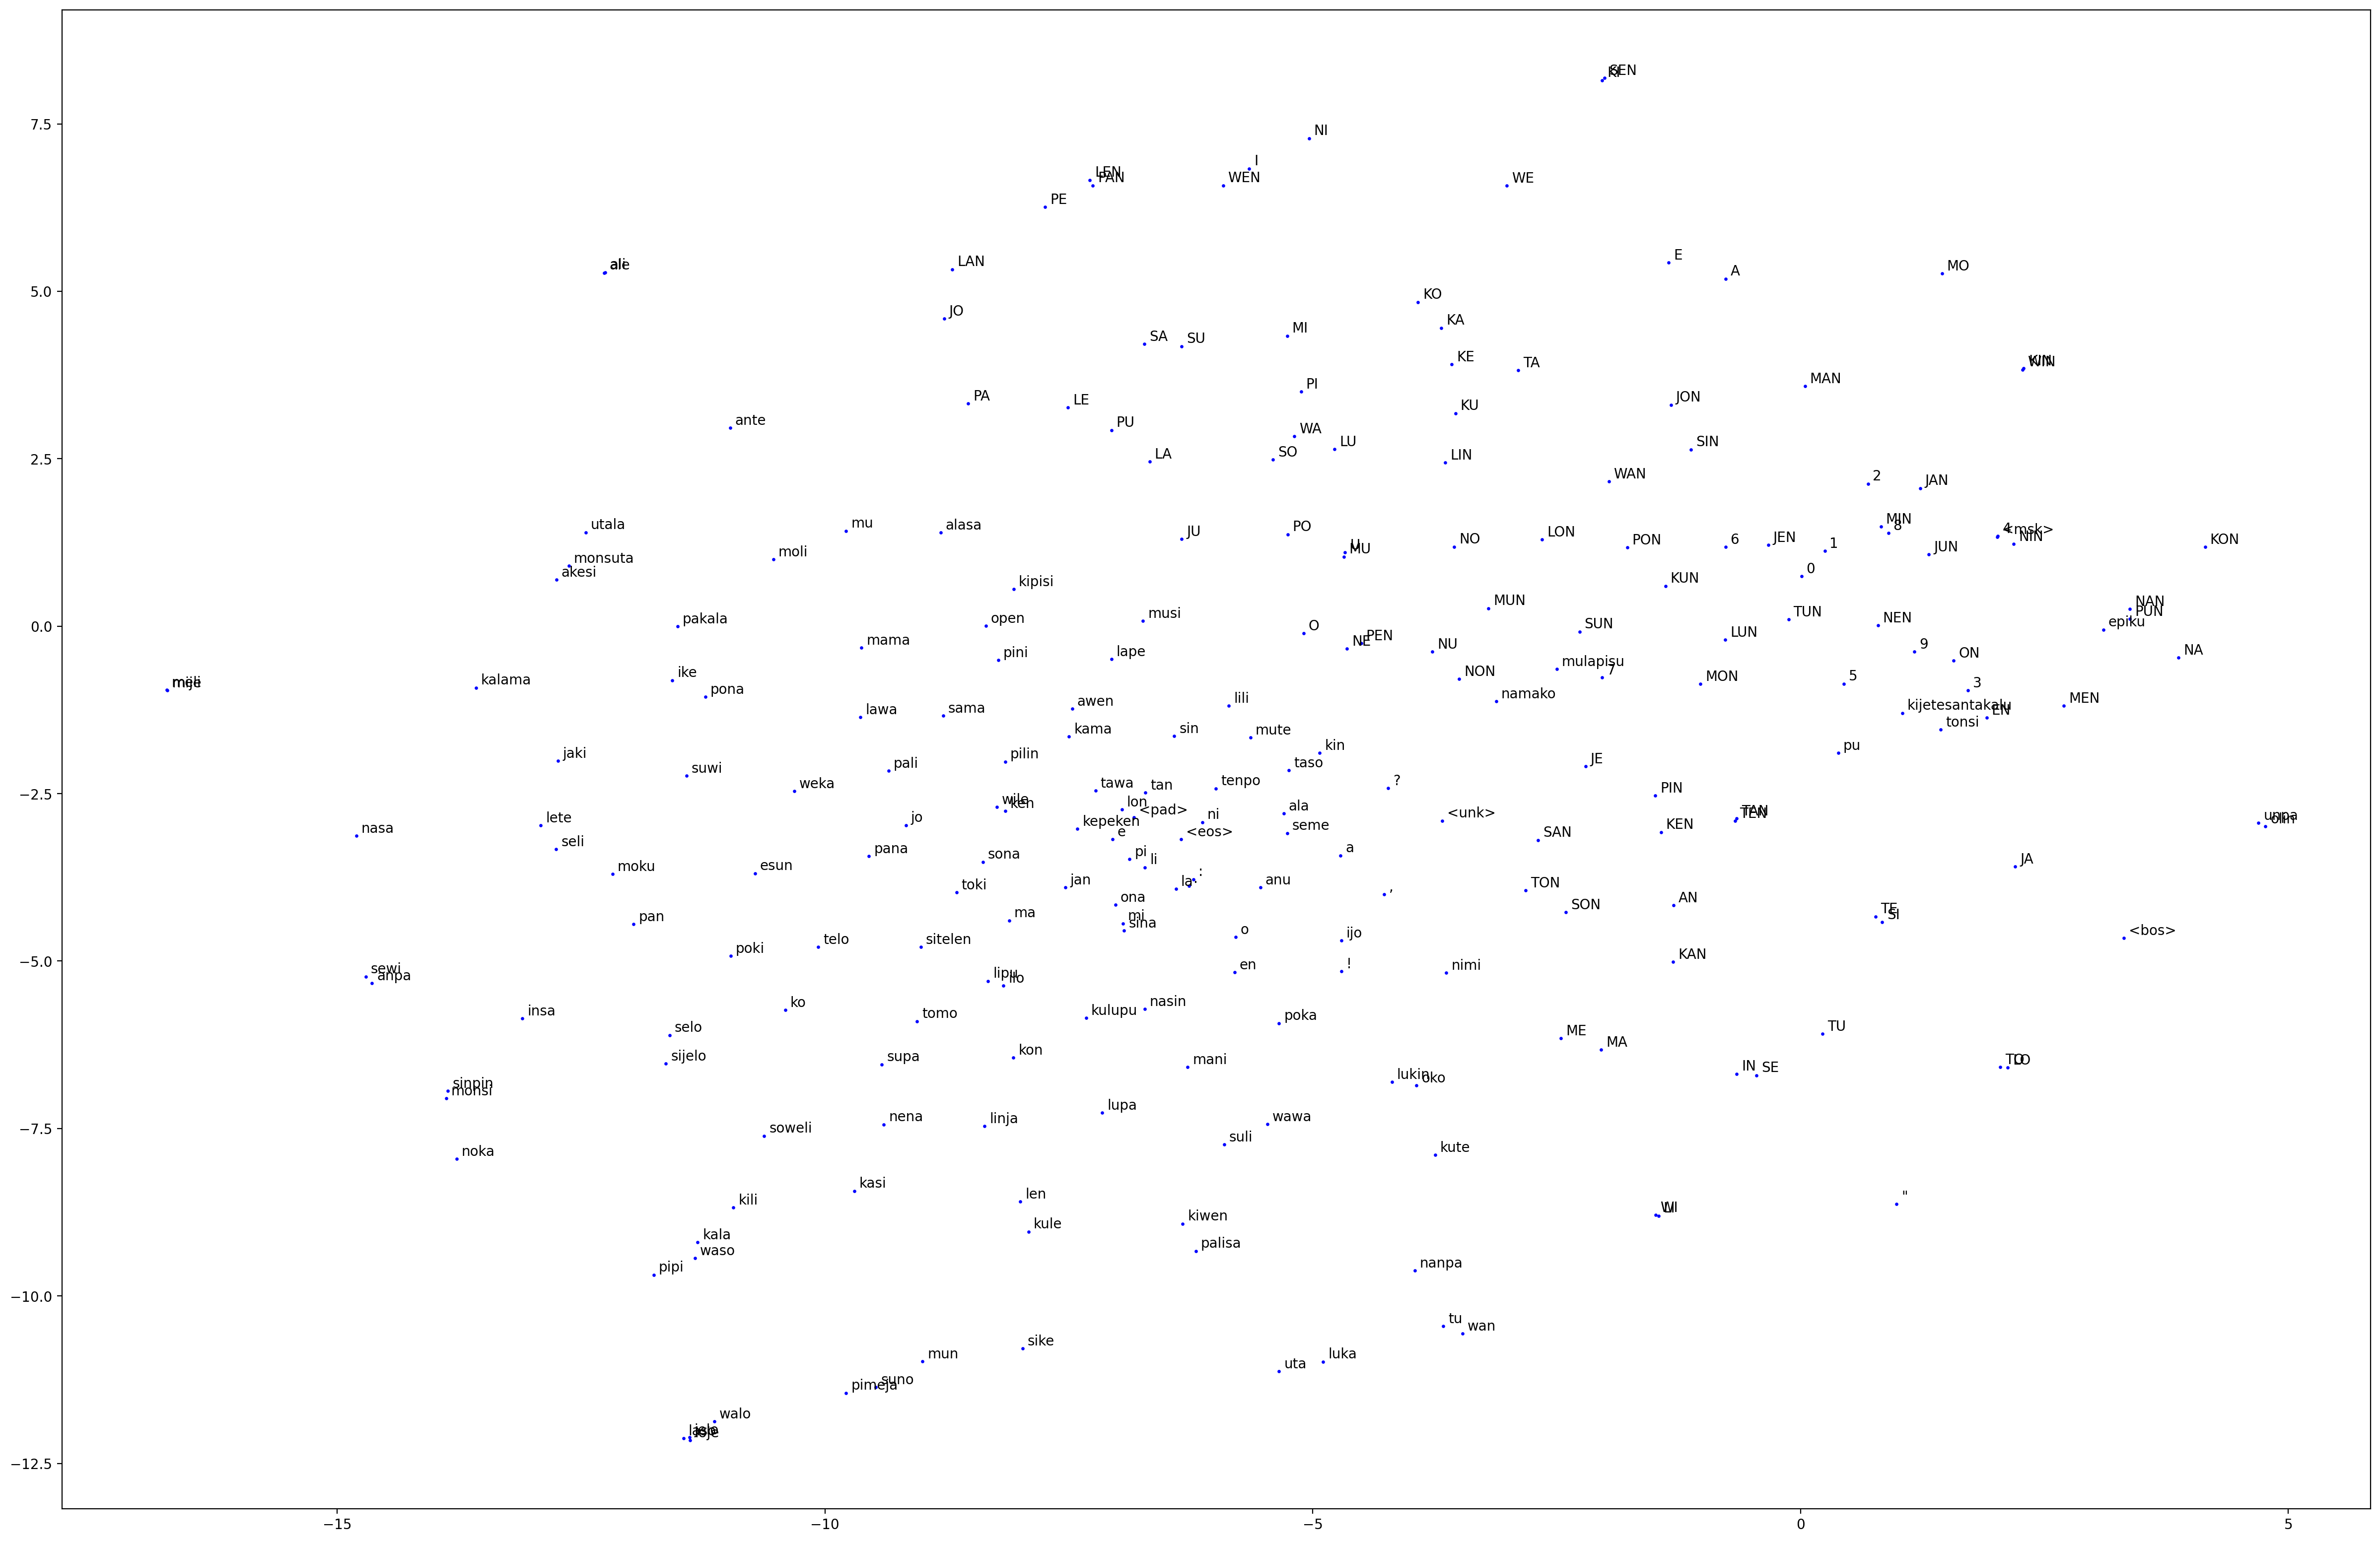

In [5]:
tsne = TSNE(n_components = 2, perplexity = 10, n_iter = 10000)
xy = tsne.fit_transform(embed)

plt.figure(dpi = 200, figsize = (30, 20))
for i, (x, y) in enumerate(xy):
    plt.scatter(x, y, color = 'blue', s = 2, marker = 'o')
    plt.annotate(vocab[i], (x + 0.05, y + 0.05))
plt.show()